# <font color=red>TP2 :  Interplolation polynômiale </font>

En analyse numérique, l’interpolation polynômiale est une technique d’interpolation d’une fonction par un polynôme. Etant donnés une fonction f : [a, b] → R et N > 1 un entier naturel. Soient x_0 , x_1 , · · · , x_N (N + 1) points (appelés aussi des noeuds) deux à deux distincts dans [a, b]. Le but est de chercher à trouver un polynôme p (à coefficients réels) vérifiant le système suivant :

f (x_i ) = p(x_i), pour tout i = 0, 1, · · · ,N
deg(p) <= N.
</FONT></p>

<b> Objectif: </b> il s’agit de trouver une courbe, généralement polynomiale, soit qui passe par ces points, soit qui passe près de ces points avec, éventuellement, des conditions supplémentaires (par exemple sur la pente).

Le polynôme d'interpolation de Lagrange permet d'interpoler une série de points par un polynôme qui passe exactement par ces points appelés aussi nœuds

##  <font color=green>Polynome d'interpolation de Lagrange. </font>

> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

In [4]:
from numpy import prod
def PR(x,y,c):
    S = [] 
    n = len(x)
    
    for i in range(n):
        L =[c-k for k in x]
        for j in range(n):
            if (j == i):                
                L[j] = 1
            else:
                L[j] = L[j]/(x[i] - x[j])   
        S.append(prod(L))
      
    return  S

In [5]:
X=[0,1,2,3]
Y=[-1,-3,-2,0]
for i in X:
    print(PR(X,Y,i))

[1.0, 0.0, -0.0, 0.0]
[-0.0, 1.0, 0.0, -0.0]
[0.0, -0.0, 1.0, 0.0]
[-0.0, 0.0, -0.0, 1.0]


###  <font color=purple>Cette fonction donnee le polynôme d’interplation de Lagrange associe aux couples: (1,-1),(2,0),(3,2),(4,1)
 </font>

2) Que contient le vecteur LL après la fin de la boucle kk .



In [6]:
X=[0,1,2,3]
Y=[-1,-3,-2,0]
S = Y 
n = len(X)
for c in X:
        for i in range(n):
            L =[c-k for k in X]
            for j in range(n):
                if (j == i):                
                    L[j] = 1
                else:
                    L[j] = L[j]/(X[i] - X[j])   
            S.append(Y[i]*prod(L))
        sum(S)

In [7]:
L

[1.0, 1.0, 1.0, 1]

###  <font color=purple>le vecteur L contient les cofficients de L4(x)
 </font>

3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.



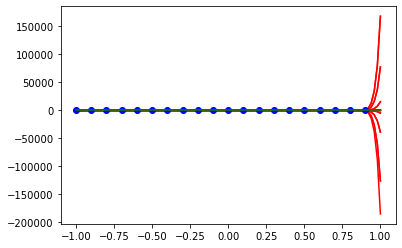

In [8]:
import matplotlib.pyplot as plt
import numpy as np
f=lambda x: 1/(1+x**2)
x=np.arange(-1.0, 1.0, 0.1)
y=[f(i) for i in x]
pt=[]
t=np.linspace(-1,1,100)
for u in range(len(t)):
    pt.append(PR(x,y,t[u]))
plt.plot(t,pt,'r',x,y,'bo',t,f(t),'g')

4) On considère la fonction $F$ suivante : $$ F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad h\in [0,2], $$ et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux points $x_0,\,\ldots,\,x_n$.

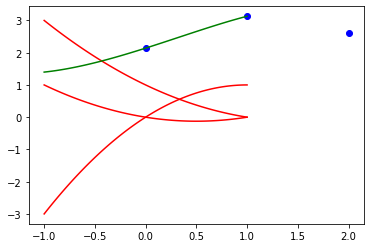

In [9]:
from math import *
f=lambda x: pi-cos(x/2)+x*sqrt(1-(x/2)**2)
x=np.linspace(0,2,3)
y=[f(i) for i in x]
pn=[]
tn=np.linspace(-1,1,100)
for u in range(len(tn)):
    pn.append(PR(x,y,tn[u]))
k=[f(i) for i in tn]
plt.plot(tn,pn,'r',x,y,'bo',tn,k,'g')
plt.show()

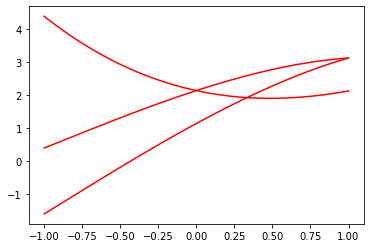

In [10]:
f=lambda x: pi-cos(x/2)+x*sqrt(1-(x/2)**2)
x=np.linspace(0,2,3)
y=[f(i) for i in x]
for u in range(len(tn)):
    pn.append(PR(x,y,tn[u]))
k=[f(i)-j for i,j in zip(tn,pn)]
plt.plot(tn,k,'r')

##  <font color=green>Exercice 2 : Phenomène de Runge 
 </font>

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$, en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

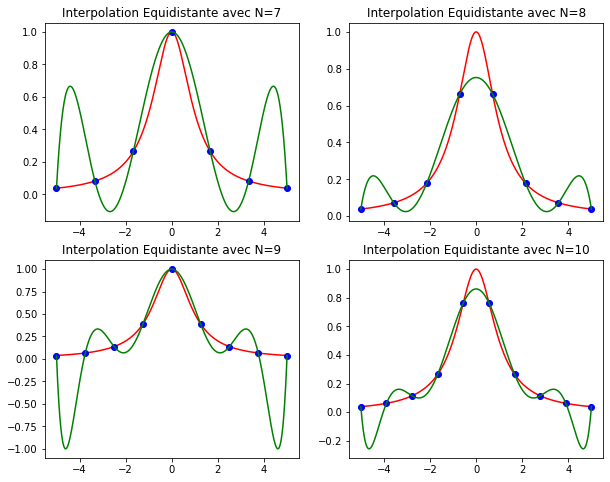

In [11]:
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
fig=plt.figure(1,figsize=(10,8))
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=7')
##############################
##############################
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2);
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
plt.subplot(2,2,2)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=8')
##############################
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2);
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
plt.subplot(2,2,3)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=9')
##############################
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2);
Y=[f(i) for i in X]
p=np.polyfit(X,Y,N-1)
plt.subplot(2,2,4)
k=np.polyval(p,t)
plt.plot(t,f(t),'r',X,Y,'ob', t,k,'g')
plt.title('Interpolation Equidistante avec N=10')

Remarque lorsqu'on augmente le nombre d'interpolation (N) px sera plus proche de la fonction F

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par : $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [12]:
from math import *
def tcheb(a,b,n):
    V=[]
    for k in range(n):
        V.append((a+b)/2+(a-b)/2*cos((k-1)/(n-1)*pi))
    return V

C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

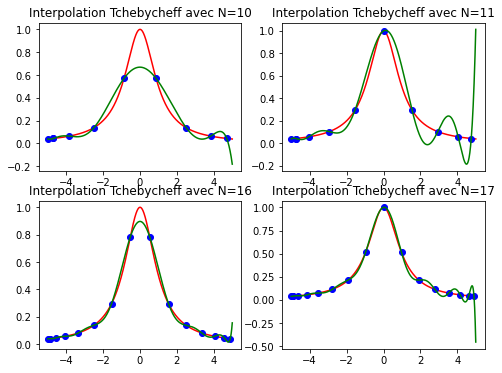

In [13]:
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
fig=plt.figure(1,figsize=(8,6))
plt.subplot(2,2,1)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=10")
###################################################
N=11
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=11")
##########################################################
N=16
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,3)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=16")
##########################################################
N=17
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N);
Yt=[f(i) for i in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,4)
k=np.polyval(pt,t)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, k,'g')
plt.title("Interpolation Tchebycheff avec N=17")

Remarque lorsqu'on augmente le nombre d'interpolation (N) px sera plus proche de la fonction F

* <b> Un inconvénient de l’interplation de Lagrange </b> est lorsqu’on ajoute un point xN+1 aux points exitants x0, x1, · · · , xN, on a recours à re-calculer tous les élements Li pour chaque i = 0, · · · , N + 1, c’est à dire répèter tout le travail et donc une perte de temps
In a donc à chercher une autre méthode plus pratique, avec moins de coût.


<b> C'est la méthode de Newton. </b>


<b> alternative de Newton (ou méthode des différences divisées) </b> Cette méthode ne diffère de l’interpolation lagrangienne que par la façon dont le polynôme est calculé, le polynôme d’interpolation qui en résulte est le même. Pour cette raison, on parle aussi plutôt de la forme de Newton du polynôme de Lagrange. Le polynôme d’interpolation de Newton associé à la fonction f aux noeuds x0, x1, · · · , xN s’écrit comme suit : p(x) =f [x0] + f x0, x1 + · · · + f x0, x1, · · · , xN(x − x1)· · ·(x − xN−1), avec f [x0] = f (x0)

##  <font color=green>Exercice 3 : </font>



1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :

$\begin{array}{|c|c|c|} \hline i & x_i & y_i \\ \hline 0 & -1 & 6 \\ 1 & 0 & 1 \\ 2 & 2 & 3 \\ 3 & 5 & 66 \\ \hline \end{array}$

In [14]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [15]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [16]:
p=y(0)+f(1)(x-x0)+f(2)(x-x0)(x-x1)+f(3)(x-x0)(x-x1)(x-x2)

TypeError: 'list' object is not callable

In [17]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [18]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.



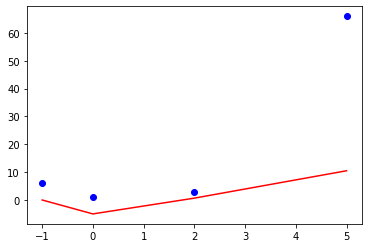

In [19]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')


3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).



In [20]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

4) Recalculer à la main et puis à l'aide du Programme neville la valeur de P(1) .

Un avantage de l’interplation de Newton est lorsqu’on ajoute un point xN+1, on a recours juste à calculer f [x0, x1, · · · , xN+1] et le polynôme associé aux points x0, x1, · · · , xN+1 est alors p(x) =f [x0] + f x0, x1 + · · · + f x0, x1, · · · , xN(x − x1)· · ·(x − xN−1) +f x0, x1, · · · , xN, xN+1(x − x1)· · ·(x − xN)

 